### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt 
import plotly.offline as pyo

pyo.init_notebook_mode()

In [ ]:
pd.set_option('display.max_columns', None)  # or specify a number, e.g., 100

# Set the width of the display
pd.set_option('display.width', 1000)

### Connecting to SQLITE db

In [3]:
con = sqlite3.connect('./Desktop/nba.sqlite')

### Loading last 20 years data in to pandas dataframe

In [383]:
game20y = pd.read_sql_query('select * from game20y order by game_date',con)

In [384]:
game20y

,season_id,game_date,team_abbreviation_home,team_abbreviation_away,wl_home,pts_home,pts_away,matchup_home,season_type,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home
0,22002,2003-01-01 00:00:00,ATL,MIA,L,73.0,107.0,ATL vs. MIA,Regular Season,25.0,66.0,0.379,3.0,14.0,0.214
1,22002,2003-01-01 00:00:00,NYK,TOR,W,95.0,75.0,NYK vs. TOR,Regular Season,37.0,77.0,0.481,4.0,10.0,0.400
2,22002,2003-01-02 00:00:00,CHI,WAS,L,82.0,107.0,CHI vs. WAS,Regular Season,33.0,91.0,0.363,4.0,13.0,0.308
3,22002,2003-01-02 00:00:00,PHX,PHI,W,96.0,78.0,PHX vs. PHI,Regular Season,38.0,81.0,0.469,8.0,15.0,0.533
4,22002,2003-01-02 00:00:00,DAL,LAC,W,102.0,92.0,DAL vs. LAC,Regular Season,38.0,89.0,0.427,1.0,11.0,0.091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26735,42022,2023-06-01 00:00:00,DEN,MIA,W,104.0,93.0,DEN vs. MIA,Playoffs,40.0,79.0,0.506,8.0,27.0,0.296
26736,42022,2023-06-04 00:00:00,DEN,MIA,L,108.0,111.0,DEN vs. MIA,Playoffs,39.0,75.0,0.520,11.0,28.0,0.393
26737,42022,2023-06-07 00:00:00,MIA,DEN,L,94.0,109.0,MIA vs. DEN,Playoffs,34.0,92.0,0.370,11.0,35.0,0.314
26738,42022,2023-06-09 00:00:00,MIA,DEN,L,95.0,108.0,MIA vs. DEN,Playoffs,35.0,78.0,0.449,8.0,25.0,0.320


### Points Distribution

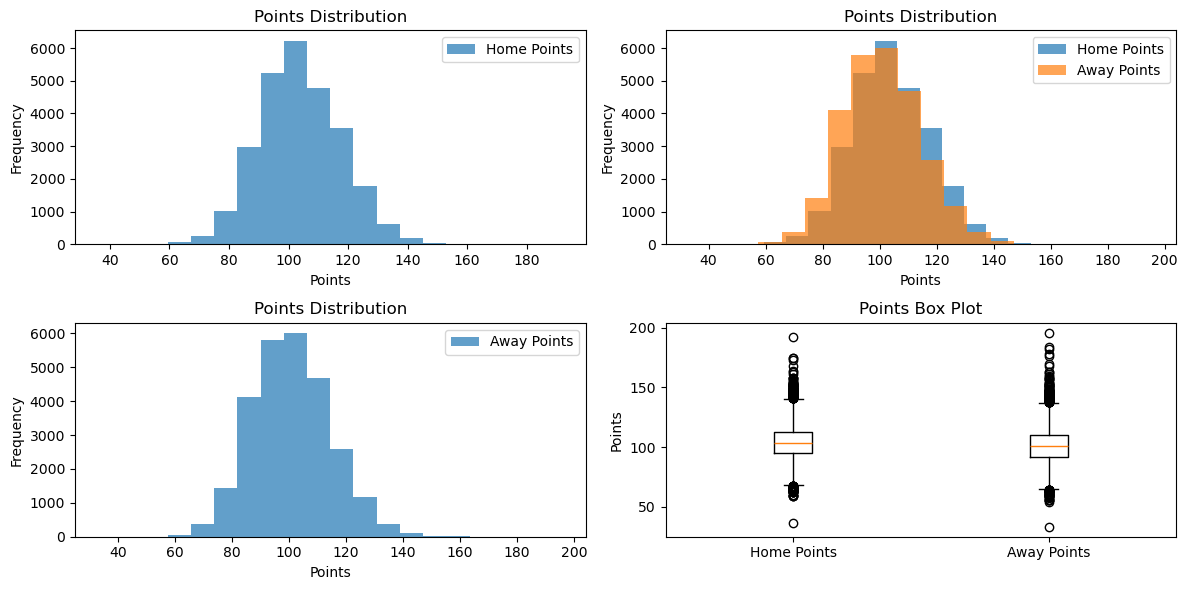

In [256]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(game20y['pts_home'], bins=20, alpha=0.7, label='Home Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Points Distribution')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(game20y['pts_home'], bins=20, alpha=0.7, label='Home Points')
plt.hist(game20y['pts_away'], bins=20, alpha=0.7, label='Away Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Points Distribution')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(game20y['pts_away'], bins=20, alpha=0.7, label='Away Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Points Distribution')
plt.legend()

plt.subplot(2, 2, 4)
plt.boxplot([game20y['pts_home'],game20y['pts_away']], labels=['Home Points', 'Away Points'])
plt.ylabel('Points')
plt.title('Points Box Plot')

plt.tight_layout()
plt.show()

### Win/Loss ration (success rate of home teams)

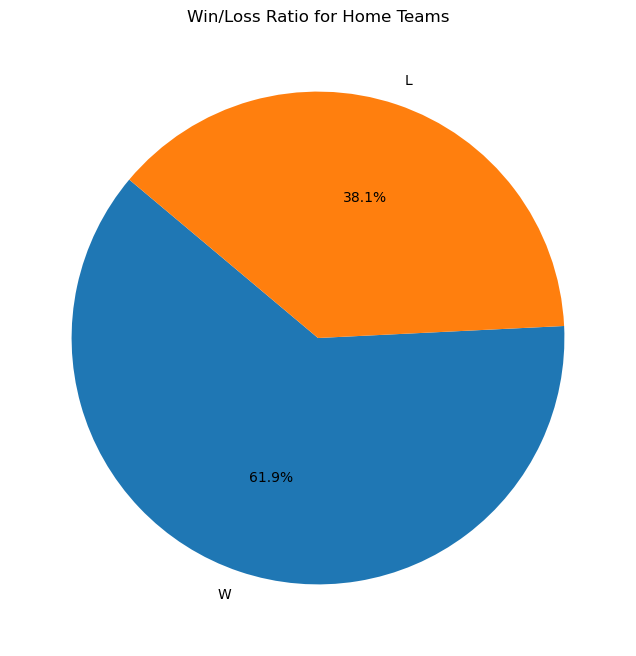

In [374]:
wl_counts = game20y['wl_home'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(wl_counts, labels=wl_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Win/Loss Ratio for Home Teams')
plt.show()

In [376]:
pd.read_sql_query('select * from game where wl_home is NULL',con)

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type


### Highest score in each season

In [385]:
query = '''
SELECT DISTINCT
    season_type,
    MAX(
        CASE
            WHEN pts_home > pts_away THEN pts_home
            ELSE pts_away
        END
    ) OVER (PARTITION BY season_type) as max_points
FROM game20y
ORDER BY max_points DESC
'''

In [386]:
pd.read_sql_query(query,con)

,season_type,max_points
0,AllStar,196.0
1,Regular Season,176.0
2,Playoffs,154.0
3,Pre Season,144.0


In [387]:
gamenum_seasons = pd.read_sql_query('select season_type,count(*) as total_games from game20y group by (season_type)',con)

In [388]:
gamenum_seasons

,season_type,total_games
0,AllStar,21
1,Playoffs,1674
2,Pre Season,1536
3,Regular Season,23509


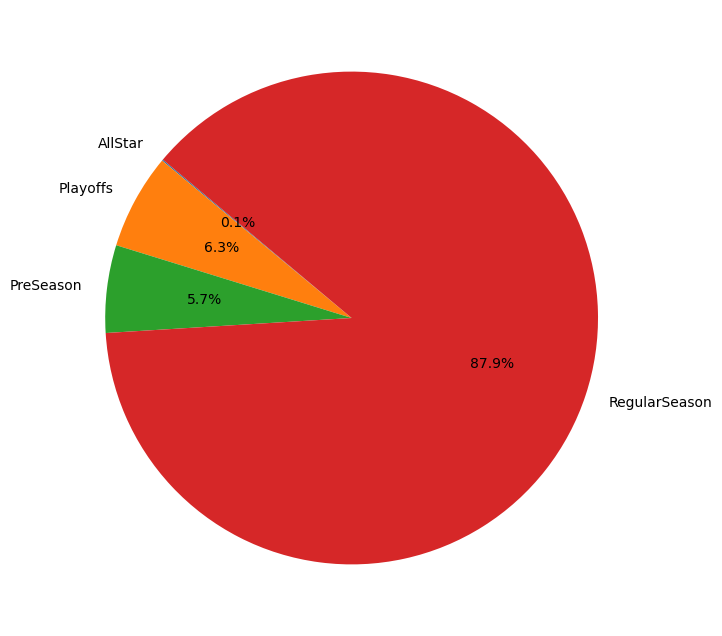

In [270]:
plt.figure(figsize=(8,8))
plt.pie(gamenum_seasons['total_games'],labels = gamenum_seasons['season_type'],autopct='%1.1f%%',startangle=140  )
plt.show()

In [511]:
df = pd.read_sql_query('select * from game where game_date >= "2003-01-01"',con)

In [512]:
df.count()

season_id                 26740
team_id_home              26740
team_abbreviation_home    26740
team_name_home            26740
game_id                   26740
game_date                 26740
matchup_home              26740
wl_home                   26740
min                       26740
fgm_home                  26740
fga_home                  26740
fg_pct_home               26740
fg3m_home                 26740
fg3a_home                 26740
fg3_pct_home              26740
ftm_home                  26740
fta_home                  26740
ft_pct_home               26739
oreb_home                 26740
dreb_home                 26740
reb_home                  26740
ast_home                  26740
stl_home                  26740
blk_home                  26740
tov_home                  26740
pf_home                   26740
pts_home                  26740
plus_minus_home           26740
video_available_home      26740
team_id_away              26740
team_abbreviation_away    26740
team_nam

In [513]:
df.describe()

,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away
count,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26739.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000,26740.000000
mean,241.722364,38.395026,83.346185,0.461507,8.366118,23.264697,0.356425,18.722064,24.610322,0.761908,10.953777,32.439230,43.393007,22.927711,7.614398,5.067427,14.331114,20.709088,103.878721,2.840950,0.494353,37.466043,83.314398,0.450405,8.200112,23.245999,0.349649,17.905236,23.584592,0.759975,10.656171,31.471690,42.127861,21.603964,7.562266,4.584966,14.634144,21.385789,101.037771,-2.840950,0.494353
std,7.464993,5.572140,8.134294,0.056799,4.275638,9.621990,0.111177,6.366431,7.901535,0.099880,3.963731,5.552695,6.638809,5.249806,2.951717,2.606678,4.015864,4.475722,13.542842,13.551997,0.499977,5.532622,8.174565,0.055703,4.201684,9.574652,0.109336,6.148620,7.582859,0.103152,3.899581,5.528501,6.561130,5.208241,2.926550,2.424706,4.100480,4.676914,13.718761,13.551997,0.499977
min,120.000000,12.000000,29.000000,0.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.143000,0.000000,3.000000,15.000000,6.000000,0.000000,0.000000,0.000000,5.000000,36.000000,-68.000000,0.000000,9.000000,31.000000,0.244000,0.000000,1.000000,0.000000,0.000000,0.000000,0.143000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,33.000000,-73.000000,0.000000
25%,240.000000,35.000000,78.000000,0.422000,5.000000,16.000000,0.286000,14.000000,19.000000,0.700000,8.000000,29.000000,39.000000,19.000000,6.000000,3.000000,12.000000,18.000000,95.000000,-7.000000,0.000000,34.000000,78.000000,0.413000,5.000000,16.000000,0.280000,14.000000,18.000000,0.696000,8.000000,28.000000,38.000000,18.000000,6.000000,3.000000,12.000000,18.000000,92.000000,-11.000000,0.000000
50%,240.000000,38.000000,83.000000,0.461000,8.000000,22.000000,0.357000,18.000000,24.000000,0.767000,11.000000,32.000000,43.000000,23.000000,7.000000,5.000000,14.000000,20.000000,103.000000,4.000000,0.000000,37.000000,83.000000,0.449000,8.000000,22.000000,0.350000,17.000000,23.000000,0.765000,10.000000,31.000000,42.000000,21.000000,7.000000,4.000000,14.000000,21.000000,101.000000,-4.000000,0.000000
75%,240.000000,42.000000,89.000000,0.500000,11.000000,30.000000,0.429000,23.000000,30.000000,0.833000,13.000000,36.000000,48.000000,26.000000,9.000000,7.000000,17.000000,24.000000,113.000000,11.000000,1.000000,41.000000,89.000000,0.488000,11.000000,30.000000,0.419000,22.000000,28.000000,0.833000,13.000000,35.000000,46.000000,25.000000,9.000000,6.000000,17.000000,24.000000,110.000000,7.000000,1.000000
max,340.000000,84.000000,143.000000,0.687000,28.000000,77.000000,1.000000,51.000000,64.000000,1.000000,44.000000,55.000000,72.000000,60.000000,22.000000,20.000000,34.000000,41.000000,192.000000,73.000000,1.000000,82.000000,149.000000,0.687000,35.000000,90.000000,1.000000,52.000000,64.000000,1.000000,40.000000,60.000000,81.000000,51.000000,23.000000,19.000000,38.000000,45.000000,196.000000,68.000000,1.000000


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26740 entries, 0 to 26739
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season_id               26740 non-null  object 
 1   team_id_home            26740 non-null  object 
 2   team_abbreviation_home  26740 non-null  object 
 3   team_name_home          26740 non-null  object 
 4   game_id                 26740 non-null  object 
 5   game_date               26740 non-null  object 
 6   matchup_home            26740 non-null  object 
 7   wl_home                 26740 non-null  object 
 8   min                     26740 non-null  int64  
 9   fgm_home                26740 non-null  float64
 10  fga_home                26740 non-null  float64
 11  fg_pct_home             26740 non-null  float64
 12  fg3m_home               26740 non-null  float64
 13  fg3a_home               26740 non-null  float64
 14  fg3_pct_home            26740 non-null

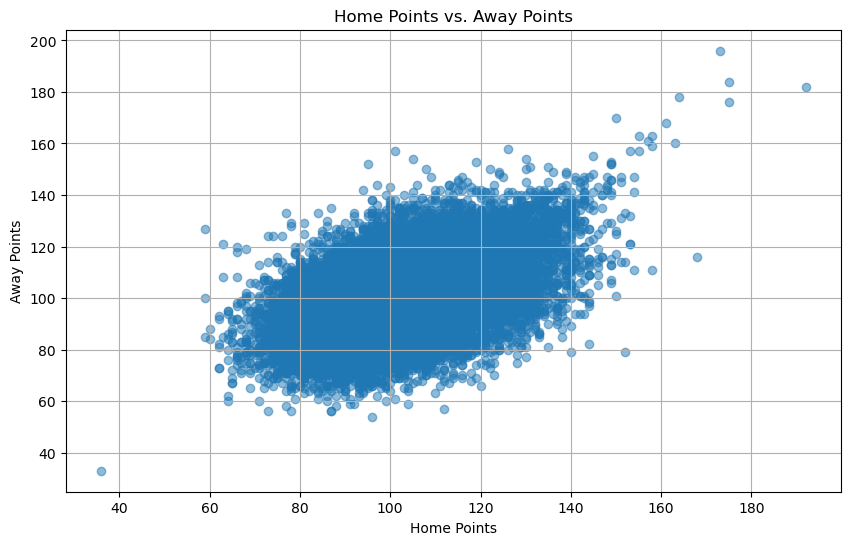

In [402]:
plt.figure(figsize=(10, 6))
plt.scatter(df['pts_home'], df['pts_away'], alpha=0.5)
plt.xlabel('Home Points')
plt.ylabel('Away Points')
plt.title('Home Points vs. Away Points')
plt.grid(True)
plt.show()

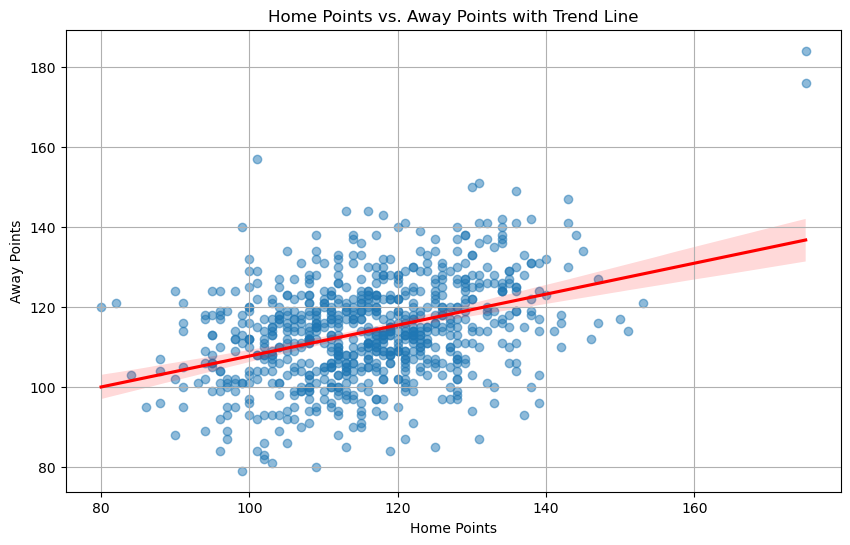

In [543]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='pts_home', y='pts_away', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Home Points')
plt.ylabel('Away Points')
plt.title('Home Points vs. Away Points with Trend Line')
plt.grid(True)
plt.show()

In [571]:
WinRatio20y=pd.read_sql_query("""
    with home as(SELECT 
        team_abbreviation_home, 
        team_name_home,
        COUNT(CASE WHEN wl_home = 'W' THEN 1 END) AS wins, 
        COUNT(*) AS total_games,COUNT(CASE WHEN wl_home = 'W' THEN 1 END)*1.0/COUNT(*) as win_ratio
    FROM game 
    WHERE game_date >= '2003-01-01' and season_type IN ('Regular Season', 'Playoffs')  
    GROUP BY team_abbreviation_home, team_name_home 
    having total_games>200
    ORDER BY win_ratio DESC),
    nonhome as(SELECT 
        team_abbreviation_away, 
        team_name_away,
        COUNT(CASE WHEN wl_away = 'W' THEN 1 END) AS wins, 
        COUNT(*) AS total_games,COUNT(CASE WHEN wl_away = 'W' THEN 1 END)*1.0/COUNT(*) as win_ratio
    FROM game 
    WHERE game_date >= '2003-01-01' and season_type IN ('Regular Season', 'Playoffs')
    GROUP BY team_abbreviation_away 
    having total_games>200
    ORDER BY win_ratio DESC)
    
    select a.team_abbreviation_home,a.win_ratio as hwinratio,b.win_ratio as nhwinratio,(a.wins+b.wins)*1.0/(a.total_games+b.total_games)as winratio from home a join nonhome b on a.team_abbreviation_home = b.team_abbreviation_away order by winratio Desc limit 10
""", con)


In [573]:
WinRatio20y

,team_abbreviation_home,hwinratio,nhwinratio,winratio
0,SAS,0.732662,0.544134,0.638345
1,DAL,0.662763,0.491289,0.576676
2,BOS,0.634066,0.493923,0.564187
3,GSW,0.670494,0.448037,0.559585
4,MIA,0.648829,0.456376,0.552764
5,DEN,0.662353,0.428404,0.545241
6,OKC,0.623779,0.460784,0.542414
7,HOU,0.619552,0.464623,0.542133
8,UTA,0.654306,0.414489,0.533969
9,LAL,0.617580,0.441379,0.529782


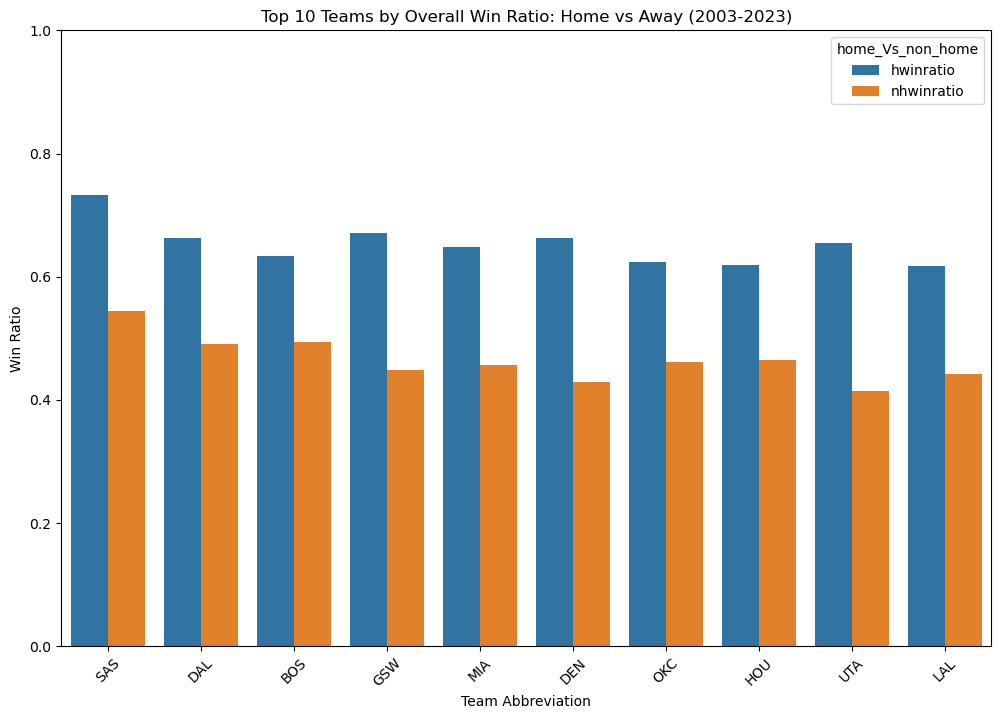

In [574]:
# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create a grouped barplot
df_melted = WinRatio20y.melt(id_vars="team_abbreviation_home", value_vars=["hwinratio", "nhwinratio"], 
                    var_name="home_Vs_non_home", value_name="Win_Ratio")

# Plotting
sns.barplot(x="team_abbreviation_home", y="Win_Ratio", hue="home_Vs_non_home", data=df_melted)

# Add title and labels
plt.title("Top 10 Teams by Overall Win Ratio: Home vs Away (2003-2023)")
plt.xlabel("Team Abbreviation")
plt.ylabel("Win Ratio")
plt.ylim(0, 1)  # Optional: Set y-axis limits
plt.xticks(rotation=45)  # Rotate x labels if needed for better readability

# Display the plot
plt.show()


In [386]:
dTeam = pd.read_sql_query("select * from Game where team_abbreviation_home = 'SAS' and game_date >= '2003-01-01' and season_type IN ('RegularSeason', 'Playoff') ",con)

In [387]:
dTeam.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,22002,1610612759,SAS,San Antonio Spurs,0020200461,2003-01-03 00:00:00,SAS vs. GSW,W,240,36.0,76.0,0.474,5.0,14.0,0.357,21.0,25.0,0.840,10.0,22.0,32.0,15.0,9.0,10.0,16.0,22.0,98.0,3,0,1610612744,GSW,Golden State Warriors,GSW @ SAS,L,37.0,88.0,0.420,4.0,15.0,0.267,17.0,23.0,0.739,24.0,26.0,50.0,18.0,5.0,6.0,19.0,25.0,95.0,-3,0,RegularSeason
1,22002,1610612759,SAS,San Antonio Spurs,0020200526,2003-01-12 00:00:00,SAS vs. BOS,W,240,28.0,71.0,0.394,5.0,20.0,0.250,20.0,32.0,0.625,12.0,26.0,38.0,14.0,8.0,7.0,15.0,20.0,81.0,1,0,1610612738,BOS,Boston Celtics,BOS @ SAS,L,31.0,74.0,0.419,6.0,23.0,0.261,12.0,13.0,0.923,9.0,32.0,41.0,11.0,7.0,4.0,16.0,30.0,80.0,-1,0,RegularSeason
2,22002,1610612759,SAS,San Antonio Spurs,0020200541,2003-01-14 00:00:00,SAS vs. PHX,W,265,37.0,92.0,0.402,6.0,18.0,0.333,28.0,33.0,0.848,19.0,37.0,56.0,21.0,7.0,9.0,13.0,21.0,108.0,8,0,1610612756,PHX,Phoenix Suns,PHX @ SAS,L,38.0,97.0,0.392,3.0,9.0,0.333,21.0,28.0,0.750,19.0,32.0,51.0,15.0,8.0,6.0,11.0,30.0,100.0,-8,0,RegularSeason
3,22002,1610612759,SAS,San Antonio Spurs,0020200560,2003-01-17 00:00:00,SAS vs. ATL,W,240,38.0,80.0,0.475,4.0,11.0,0.364,26.0,36.0,0.722,11.0,31.0,42.0,19.0,8.0,6.0,6.0,21.0,106.0,13,0,1610612737,ATL,Atlanta Hawks,ATL @ SAS,L,38.0,81.0,0.469,5.0,8.0,0.625,12.0,16.0,0.750,8.0,31.0,39.0,17.0,4.0,4.0,15.0,24.0,93.0,-13,0,RegularSeason
4,22002,1610612759,SAS,San Antonio Spurs,0020200581,2003-01-20 00:00:00,SAS vs. HOU,W,240,32.0,74.0,0.432,2.0,9.0,0.222,21.0,24.0,0.875,9.0,30.0,39.0,21.0,5.0,6.0,14.0,13.0,87.0,5,0,1610612745,HOU,Houston Rockets,HOU @ SAS,L,36.0,87.0,0.414,2.0,11.0,0.182,8.0,10.0,0.800,18.0,31.0,49.0,20.0,9.0,5.0,14.0,20.0,82.0,-5,0,RegularSeason


In [388]:
dTeam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season_id               784 non-null    object 
 1   team_id_home            784 non-null    object 
 2   team_abbreviation_home  784 non-null    object 
 3   team_name_home          784 non-null    object 
 4   game_id                 784 non-null    object 
 5   game_date               784 non-null    object 
 6   matchup_home            784 non-null    object 
 7   wl_home                 784 non-null    object 
 8   min                     784 non-null    int64  
 9   fgm_home                784 non-null    float64
 10  fga_home                784 non-null    float64
 11  fg_pct_home             784 non-null    float64
 12  fg3m_home               784 non-null    float64
 13  fg3a_home               784 non-null    float64
 14  fg3_pct_home            784 non-null    fl

In [389]:
pd.read_sql_query("select team_abbreviation_away,count(*) as played_against_SAS from Game where team_abbreviation_home = 'SAS' and game_date >= '2003-01-01' group by team_abbreviation_away order by played_against_SAS Desc",con)

,team_abbreviation_away,played_against_SAS
0,DAL,52
1,PHX,51
2,HOU,51
3,MEM,50
4,LAL,47
5,DEN,46
6,GSW,42
7,LAC,41
8,UTA,40
9,POR,38
